<a href="https://colab.research.google.com/github/Clairekmkim/Clairekmkim/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EC%9D%91%EC%9A%A9_5%EA%B0%95_Discriminant_Analysis_LDA_QDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(344, 7)
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


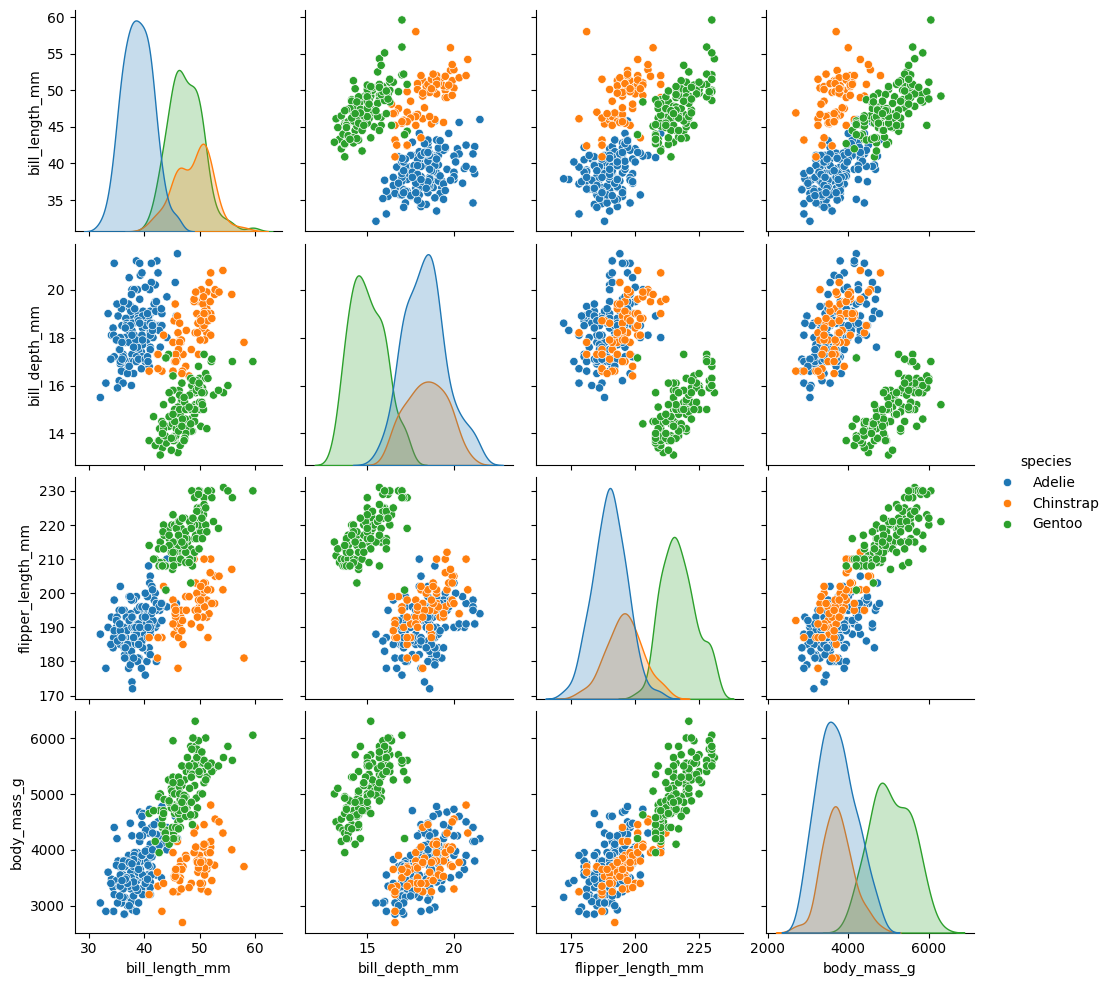

QDA 모델의 정확도: 1.0000
QDA 모델의 혼동 행렬:
[[47  0  0]
 [ 0 21  0]
 [ 0  0 36]]

QDA 모델의 분류 보고서:
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        47
   Chinstrap       1.00      1.00      1.00        21
      Gentoo       1.00      1.00      1.00        36

    accuracy                           1.00       104
   macro avg       1.00      1.00      1.00       104
weighted avg       1.00      1.00      1.00       104



In [11]:
import os
import numpy as np
import pandas as pd
import collections
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Seaborn 라이브러리에서 'penguins' 데이터셋 로드
penguins = sns.load_dataset("penguins")

# 데이터셋의 shape(행과 열의 수) 출력
print(penguins.shape)

# 데이터셋의 처음 몇 행 출력
print(penguins.head())

# 'bill_length_mm' 열의 결측값을 평균으로 채우기
penguins['bill_length_mm'].fillna(value=penguins['bill_length_mm'].mean(), inplace=True)

# 'bill_depth_mm' 열의 결측값을 평균으로 채우기
penguins['bill_depth_mm'].fillna(value=penguins['bill_depth_mm'].mean(), inplace=True)

# 'flipper_length_mm' 열의 결측값을 평균으로 채우기
penguins['flipper_length_mm'].fillna(value=penguins['flipper_length_mm'].mean(), inplace=True)

# 'body_mass_g' 열의 결측값을 평균으로 채우기
penguins['body_mass_g'].fillna(value=penguins['body_mass_g'].mean(), inplace=True)

# 특성(X)과 타겟(y) 분리
X = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y = penguins.iloc[:, 0]  # 첫 번째 열을 타겟으로 설정 (실제로는 'species' 열일 가능성이 높습니다)

# 훈련 세트와 테스트 세트로 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

sns.pairplot(penguins, diag_kind='kde', hue='species')
plt.show()

# LDA 모델 생성
lda = LinearDiscriminantAnalysis()

# 훈련 데이터를 사용하여 모델 학습
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

#테스트 데이터에 대한 예측:
y_test_pred_lda = lda.predict(X_test)
#혼동 행렬(confusion matrix) 계산:
confusion_matrix(y_test, y_test_pred_lda)

lda.score(X_test, y_test)

# QDA 모델 생성 및 학습
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_test_pred_qda = qda.predict(X_test)

# 분류 정확도 계산
accuracy_qda = qda.score(X_test, y_test)
print(f"QDA 모델의 정확도: {accuracy_qda:.4f}")

# 혼동 행렬 계산
confusion_mat_qda = confusion_matrix(y_test, y_test_pred_qda)
print("QDA 모델의 혼동 행렬:")
print(confusion_mat_qda)

# 분류 보고서 출력 (선택적)
from sklearn.metrics import classification_report
print("\nQDA 모델의 분류 보고서:")
print(classification_report(y_test, y_test_pred_qda))
